# Demo 3: A general IVP solver

In this jupyter notebook, we will learn how to use the general IVP solver we wrote in `./project1/solver.py`.
Let's start from reproducing the results in `demo1` and `demo2`.


Before we start using the IVP solver, let's import the related packages first.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import solver as mysolver             # your own solver
import solver_sol as solver  # compare your results with solution
from scipy.integrate import solve_ivp as solver_scipy

# Note that if the path of your jupyter notebook is different from the path of the solver.py file, 
# you need to add the relative path of the solver.py file during the import, for example:

#import project1.solver as mysolver
#import project1.solution.solver_sol as solver

# Or, you can add the path of the solver.py file to the system path, for example:
# import sys
# sys.path.append('path_of_solver.py')


Now, let's start to reproduce `demo1` and `demo2`.
Set
* t0 = 0 sec and tmax = 20 sec
* time step dt = 0.01
* The spring constant `K` = 1
* The mass `M` = 1
* Initial condition: `x=1`, `v=0`.

In [2]:
# define the y' function
def func(t,y,K,M):
    force = -K * y[0]     # F = - k X
    f = np.zeros(len(y))
    f[0] = y[1]           # y'[0] = v
    f[1] = force/M        # y'[1] = a = F/M
    return f

In [3]:
# Prepare the input arguments
t_span = np.linspace(0,20, 2001)
t_eval = t_span
y = np.array([1,0]) # initial condition
K = 1
M = 1
args = (K,M)

# use the IVP solver
sol = solver.solve_ivp(func,t_span,y, "RK4", t_eval, args)

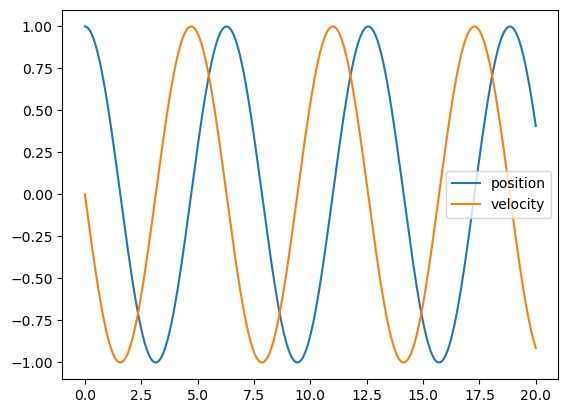

In [4]:
# visualize the results
plt.plot(t_eval, sol[0], label="position")
plt.plot(t_eval, sol[1], label="velocity")
plt.legend()
plt.show()

# Damped Oscillation

When there is a damping force ($F_{\rm damp}=-\lambda \dot{x}$), the equation of motion becomes,

$$
m\ddot{x} + \lambda \dot{x} + kx = 0
$$

### Exercise

* Use the IVP solver we developed. The only differences are the `func` and initial conditions.
* Modify the y' function (`func`) to simulate a damped oscillator (from t=0 to 20). IC: at t=0, K=M=1, A=1, $\phi= 0$,$\lambda=0.2$.
* Make plots of position(t), velocity(t), and total energy (t). Comapred your results with analytical solutions.

In [5]:
# define the y' funciotn
def func_damped(t,y,K,M,L):
    force = -K * y[0] - L * y[1]     # F = - k v - L v
    f = np.zeros(len(y))
    f[0] = y[1]                      # y'[0] = v
    f[1] = force/M                   # y'[1] = a = F/M
    return f

In [6]:
# Prepare the input arguments
t_span = np.linspace(0,20, 2001)
t_eval = t_span
y = np.array([1,0]) # initial condition
K = 1
M = 1
L = 0.2
args = (K,M,L)

# use the IVP solver
sol = solver.solve_ivp(func_damped,t_span,y, "RK4", t_eval, args)

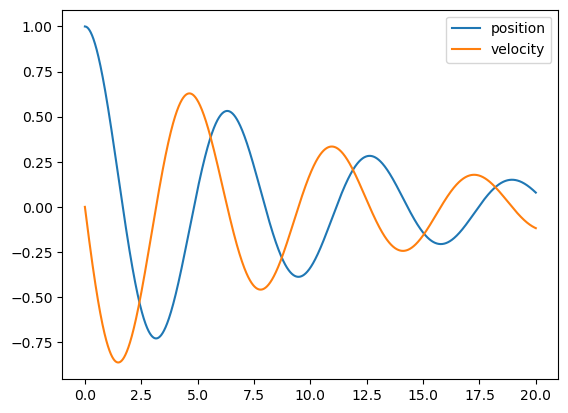

In [7]:
# visualize the results
plt.plot(t_eval, sol[0], label="position")
plt.plot(t_eval, sol[1], label="velocity")
plt.legend()
plt.show()

### Analytical Solutions

The analytical solution is

$$
x(t) = A e^{-\gamma t} \left[\cos(\omega t + \phi) \right],
$$

where $\omega = \sqrt{\gamma^2 -\omega_0^2}$ or $\omega=\sqrt{\omega_0^2-\gamma^2}$.

In [8]:
phi0   = 0
omega0 = np.sqrt(K/M)
gamma  = L/(2*M)
omega  = np.sqrt(omega0**2 - gamma**2)

xpos_ana = np.exp(-gamma*t_eval) * (np.cos(omega*t_eval + phi0))

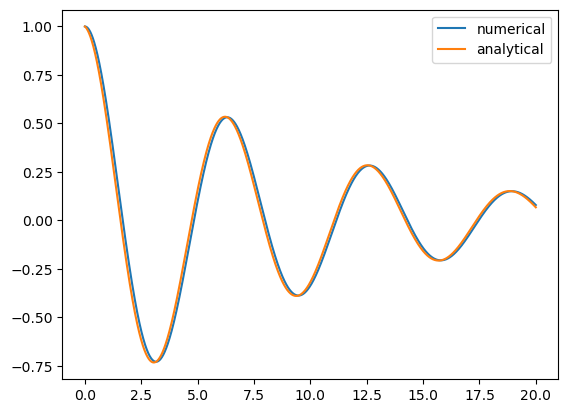

In [9]:
# visualize the results
plt.plot(t_eval, sol[0], label="numerical")
plt.plot(t_eval, xpos_ana, label="analytical")
plt.legend()
plt.show()

## Part 2

Now, let's explore the evolution of the three general cases:

* Underdamping: $\omega_0^2 > \gamma^2$
* Critical damping: $\omega_0^2 = \gamma^2$
* Overdamping: $\omega_0^2 < \gamma^2$

Vary $\lambda$, to the corresponding conditions:
* $\lambda = 0.2$ ($\omega_0^2 > \gamma^2$)
* $\lambda = 2$ ($\omega_0^2 = \gamma^2$)
* $\lambda = 2.4$ ($\omega_0^2 < \gamma^2$)

In [10]:
# Prepare the input arguments
t_span = np.linspace(0,20, 2001)
t_eval = t_span
y = np.array([1,0]) # initial condition

# use the IVP solver
sol_under = solver.solve_ivp(func_damped,t_span,y, "RK4", t_eval, args=(1,1,0.2))
sol_crit  = solver.solve_ivp(func_damped,t_span,y, "RK4", t_eval, args=(1,1,2))
sol_over  = solver.solve_ivp(func_damped,t_span,y, "RK4", t_eval, args=(1,1,5))

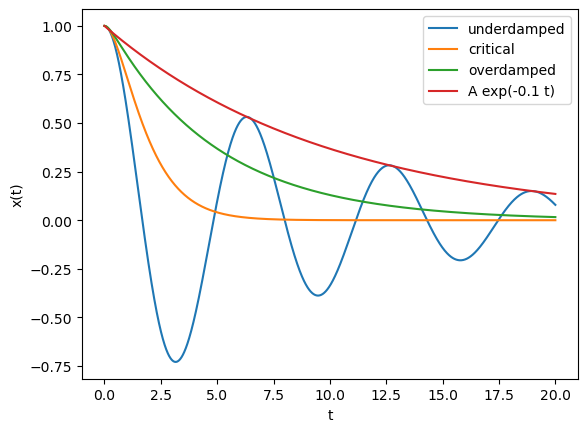

In [11]:
# compare with the funciton f = A exp(- 0.1* t)

plt.figure()
plt.plot(t_eval, sol_under[0], label="underdamped")
plt.plot(t_eval, sol_crit[0], label="critical")
plt.plot(t_eval, sol_over[0], label="overdamped")
plt.plot(t_eval, np.exp(-0.1*t_eval), label="A exp(-0.1 t)")
plt.legend()
plt.xlabel("t")
plt.ylabel("x(t)")
plt.show()

# Is this plot familiar to you?

# Forced Oscillation

* Use the IVP solver we developed. The only differences are the `func` and initial conditions.
* Modify the y' function (`func`) to simulate a forced oscillator (from t=0 to 100).
* Set the inital conditions: A=1, K=M=1, $\lambda=0.2$, $F_0=0.1$ and $\omega_f=0.8$.
* Make plots of position(t), velocity(t), and total energy(t).

In [12]:
# define the y' funciotn
def func_forced(t,y,K,M,L,F0,WF):
    force = -K * y[0] - L * y[1] + F0*np.cos(WF*t)    # F = - k v - L v + F0 sin(WF t)
    f = np.zeros(len(y))
    f[0] = y[1]                      # y'[0] = v
    f[1] = force/M                   # y'[1] = a = F/M
    return f

In [13]:
# Prepare the input arguments
t_span = np.linspace(0,100, 5001)
t_eval = t_span
A = 1
y = np.array([A,0]) # initial condition
K = 1
M = 1
L = 0.2
F0 =0.1
WF = 0.8
args = (K,M,L,F0,WF)

# use the IVP solver
sol = solver.solve_ivp(func_forced,t_span,y, "RK4", t_eval, args)

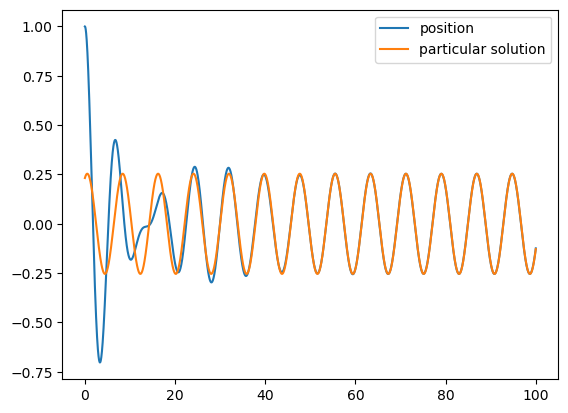

In [14]:
# Compared with the particular solution
omega0 = np.sqrt(K/M)
gamma  = L/(2*M)
D = F0/np.sqrt((omega0**2 - WF**2)**2 + 4*WF**2*gamma**2)
delta = np.arctan(2*WF*gamma/(omega0**2 - WF**2)) 

xp = D * np.cos(WF*t_eval - delta)

# visualize the results
plt.plot(t_eval, sol[0], label="position")
plt.plot(t_eval, xp, label="particular solution")
plt.legend()
plt.show()

# Resonance

* Resonance will happen when $\omega_0 = \omega_f$ without damping.
* Modify your `demo3` but set $\lambda=0$ and $\omega_f=1$.
* Re-run your simulation with $\lambda=0.1$ and $0.01$.


In [15]:
# Prepare the input arguments
t_span = np.linspace(0,100, 5001)
t_eval = t_span
A = 1
y = np.array([A,0]) # initial condition
K = 1
M = 1
L = 0.0
F0 =0.1
WF = 1.0
args = (K,M,L,F0,WF)

# use the IVP solver
sol1 = solver.solve_ivp(func_forced,t_span,y, "RK4", t_eval, args=(K,M,0.0,F0,WF))
sol2 = solver.solve_ivp(func_forced,t_span,y, "RK4", t_eval, args=(K,M,0.1,F0,WF))
sol3 = solver.solve_ivp(func_forced,t_span,y, "RK4", t_eval, args=(K,M,0.01,F0,WF))

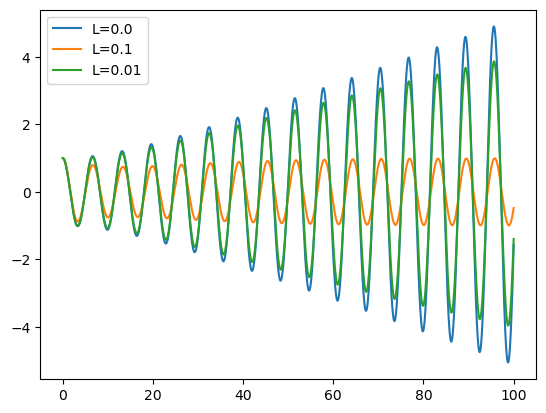

In [16]:
# visualize the results
plt.plot(t_eval, sol1[0], label="L=0.0")
plt.plot(t_eval, sol2[0], label="L=0.1")
plt.plot(t_eval, sol3[0], label="L=0.01")
plt.legend()
plt.show()

# Using `scipy`

Compare the results of our solver (`mysolver`) with the `solve_ivp` in `scipy`.

In [17]:
sol_euler = solver.solve_ivp(func_forced,t_span,y, "Euler", t_eval, args=(K,M,0.0,F0,WF))
sol_rk2 = solver.solve_ivp(func_forced,t_span,y, "RK2", t_eval, args=(K,M,0.0,F0,WF))
sol_rk4 = solver.solve_ivp(func_forced,t_span,y, "RK4", t_eval, args=(K,M,0.0,F0,WF))
sol_scipy = solver_scipy(func_forced, [0,100], y, args=(K,M,0.0,F0,WF), t_eval=t_eval, method='RK45')

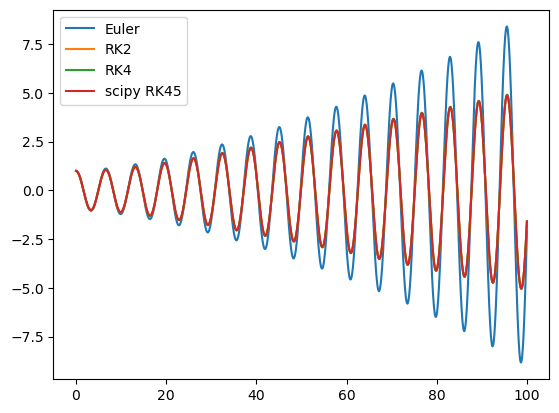

In [18]:
plt.plot(t_eval, sol_euler[0], label="Euler")
plt.plot(t_eval, sol_rk2[0], label="RK2")
plt.plot(t_eval, sol_rk4[0], label="RK4")
plt.plot(sol_scipy.t, sol_scipy.y[0], label="scipy RK45")
plt.legend()
plt.show()

# Performance

We could mesure the performance of our solver and compare it with scipy.

In [19]:
%timeit solver.solve_ivp(func_forced,t_span,y, "RK4", t_eval, args=(K,M,0.0,F0,WF))

83.8 ms ± 3.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [20]:
%timeit solver_scipy(func_forced, [0,100], y, args=(K,M,0.0,F0,WF), t_eval=t_eval, method='RK45')

8.74 ms ± 347 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Which one is faster?